# Современные методы анализа данных и машинного обучения, БИ

## НИУ ВШЭ, 2024-25 учебный год

# Семинар 12. Введение в машинное обучение


## Контекст задачи





### Напоминание о Retention
Одной из самых важных бизнес-метрик для многих компаний является customer retention. В разных областях конкретный метод подсчета может отличаться, но это всегда число, которое показывает насколько хорошо мы удерживаем клиента.

Чем выше customer retention, тем эффективнее тратится бюджет, заложенный на рекламу, потому что уже привлеченный клиент остается с нами дольше. Самый верный способ удерживать клиентов — это просто создание самого лучшего продукта на рынке. Эта задача очень сложная, но иногда и хорошего продукта не хватает, чтобы клиент не ушел.

### Подкупаем уходящих клиентов

Чтобы удержать клиента существует чит-код, которым часто пользуются компании: в момент, когда клиент собирается уйти, компания может предложить ему *большую скидку* или как-то еще *улучшить условия*, чтобы удержать клиента. При этом удержав клиента сейчас и потратив какие-то ресурсы, в будущем компания рассчитывает покрыть эти затраты и выйти в плюс.

Вы наверняка сталкивались с такими предложениями. Вот несколько примеров из жизни:

* Если написать заявление на перенесение номера телефона к другому оператору сотовой связи, то оператор почти всегда предложит вам очень выгодный тариф, не доступный для обычных клиентов.
* Если какое-то время не заказывать доставку еды в Elementary, то они пришлют промокод на 30% скидку.

    <a href="https://ibb.co/tXzBbk6"><img src="https://i.ibb.co/8cbMjTw/2021-12-04-13-12-48.png" alt="2021-12-04-13-12-48" border="0" width="50%" height="50%"></a>

* Если попробовать закрыть кредитную карту, то вам могут предложить вместо закрытия обнулить ежегодную плату за её обслуживание.

А с какими кейсами сталкивались вы? Поделитесь!

### Машинное обучение для предсказания оттока

Если мы подкупим клиента еще до того, как он принял решение уйти, то скорее всего получится уговорить его остаться за меньшее количество ресурсов. Чтобы понимать какие клиенты скоро задумаются об уходе, нам нужно делать предсказания. Именно этим и занимается машинное обучение!

Сегодня мы поработаем с [открытым датасетом от телеком компании](https://www.kaggle.com/barun2104/telecom-churn). Это табличка с числами, описывающими клиента в некоторый момент времени, а также то, произошло ли событие *«клиент ушел в течение n месяцев с момента описания»* или нет. Среднее значение по этой бинарной колонке и есть, по сути, интересующий наш retention.

<a href="https://ibb.co/swLhH2G"><img src="https://i.ibb.co/zRK1JrY/2021-12-04-12-06-43.png" alt="2021-12-04-12-06-43" border="0" width="60%" height="60%"></a>




### Дополнительные задачи

Прежде чем переходить к основной задаче, давайте поставим для себя ещё несколько дополнительных, которые одновременно с этим будут и сопутствующими, помогая нам с разных сторон приблизиться к решению основной.

Попробуем ответить на следующие вопросы в ходе исследования:

* Можно ли в принципе как-либо отделить потенциально отточных пользователей по их признакам в метрическом пространстве, не зная заранее, кто из них действительно отточный?
* Имеются ли у нас еще какие-то (более мелкие) группы пользователей, которые могут влиять на отток или, может быть, ему предшествовать?

### Краткое резюме
Итак, в качестве первичного итога нашей задачи, имеем следующие гипотезы/выводы о рассматриваемой области:

* Улучшение продукта — основной источник высокого retention rate
* Уходящих клиентов можно как-то подкупить, чтобы они остались
* Чтобы подкупать клиентов дешевле, нам нужно находить тех, кто собирается уйти, раньше. Для этого используется ML
* Чтобы понять, каким количеством денег мы можем подкупить клиента, нам нужно хорошо посчитать. Этим мы займемся как-нибудь в другой раз, но иметь это в виду также необходимо.



## Построение бейзлайна

Чтобы показать всю силу машинного обучения, мы сейчас быстро сделаем предсказания, никак не обрабатывая данные (или, иными словами, построим так называемый бейзлайн), а в дальнейшем уже будем разными способами улучшать метрики алгоритма.

Почти всегда, когда вы хотите решить какую-то реальную задачу, стоит в самом начале осуществить именно построение бейзлайна: качество, которое мы получим, будет исходным значением, и относительно него мы будем в дальнейшем фиксировать все изменения.

In [ ]:
# Скачаем наш датасет
! wget https://www.dropbox.com/s/ofr99e7skcd515m/telecom_churn.csv

--2025-03-18 09:43:57--  https://www.dropbox.com/s/ofr99e7skcd515m/telecom_churn.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/t0vxmjim9sdzqhaw3g2qs/telecom_churn.csv?rlkey=qlwbfmma1vfo24b0j6025wc4h [following]
--2025-03-18 09:43:58--  https://www.dropbox.com/scl/fi/t0vxmjim9sdzqhaw3g2qs/telecom_churn.csv?rlkey=qlwbfmma1vfo24b0j6025wc4h
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca8779716dc18fe03132fd6b2a0.dl.dropboxusercontent.com/cd/0/inline/CmF_tj12F6-jWn9Zg8JVsmfRtZ7tLjpzqzYC1LmTeZfnUM1QZ0tXH3m8PYdlr3WiWi1w0n8yzU6TpVLPuoO6j8XEPr6-eIXsTuytULjviUJm28pbD6PtU06EqQh5RC3Bi7IjMcIVVqeHX3F6vmAsFIKs/file# [following]
--2025-03-18 09:43:58--  https://uca8779716dc18fe03132fd6b2a0.dl.dropboxusercontent

Прочитаем данные

In [ ]:
import pandas as pd
import numpy as np

# Считаем наш датасет при помощи библиотеки pandas
data = pd.read_csv('telecom_churn.csv')

In [ ]:
# Посмотрим на наш датасет
data.sample(10)

Churn  AccountWeeks  ContractRenewal  DataPlan  DataUsage  \
1793      0            97                1         0       0.00   
1743      0            35                1         0       0.00   
1163      0           157                1         1       1.92   
159       0           115                1         1       2.59   
343       0            98                1         1       0.00   
2077      0           145                1         0       0.00   
2605      0           147                1         1       3.81   
685       0            63                1         1       2.32   
2158      1           166                0         0       0.00   
1450      0            93                1         0       0.00   

      CustServCalls  DayMins  DayCalls  MonthlyCharge  OverageFee  RoamMins  
1793              1    168.6        87           51.0       12.96       7.3  
1743              1    260.8        87           67.0       12.91       5.8  
1163              1    194.3       107           73.2       12.16       7.1  
159               1    142.1       124           65.9        9.17       9.6  
343               2     64.6        98           26.0        8.81       0.0  
2077              0    241.7       137           53.0        6.79      13.1  
2605              2    243.4       126          103.1       13.69      14.1  
685               1     30.9       113           45.2        9.35       8.6  
2158              0     47.7        89           31.0       13.22      13.2  
1450              0    114.3       100           39.0       11.06      10.9

Что мы можем увидеть из данных? Какая это задача: регрессии или классификации?

Посмотрим на то, сколько у нас объектов каждого класса и какова доля первого класса:


In [ ]:
print(f"Размер нулевого класса: {sum(data.Churn == 0)}")
print(f"Размер первого класса:  {sum(data.Churn == 1)}")
print(f"Доля первого класса:   {sum(data.Churn == 1) / len(data.Churn)}")

Размер нулевого класса: 2850
Размер первого класса:  483
Доля первого класса:   0.14491449144914492


In [ ]:
data.shape

(3333, 11)

Разделим табличку на признаки (то, чем можно пользоваться при предсказании) и метки (то, что мы собираемся предсказывать, целевую переменную)


In [ ]:
X = data.drop(columns='Churn')
y = data['Churn']

Теперь давайте разделим признаки и метки на две части: train и validation. Сейчас мы не будем делать test-часть, и вот почему:

* Мы пока делаем глупое тестирование метода. Т.е. не будет так называемого data leak. Что это такое — обсудим чуть позже.

* Данные для test-части стоит собирать отдельно, чтобы она точно не была похожа на train, из-за того что их собрали в одну дату, или собрал один человек, или еще по какой-то не вполне честной причине.

* У нас мало данных, качество алгоритмов сильно снизится, если мы заберем данные еще и на тест.

Для осуществления разбиения на обучение и тест (валид), воспользуемся классической функцией `train_test_split` из библиотеки `sklearn`.

Кстати, библиотека `sklearn` — это стандартная библиотека в Data Science, которая содержит различные метрики, методы предобработки данных, модели классического машинного обучения и многое-многое другое. Отныне мы будем регулярно использовать эту прекрасную библиотеку!

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=12)

In [ ]:
# Посмотрим на обучающую часть данных
X_train

AccountWeeks  ContractRenewal  DataPlan  DataUsage  CustServCalls  \
2046           120                1         0       0.00              1   
747            155                1         0       0.34              1   
180             94                0         1       2.57              4   
2968           160                1         0       0.00              1   
534             67                1         0       0.22              4   
...            ...              ...       ...        ...            ...   
3313           127                1         0       0.00              1   
3325            78                1         0       0.23              2   
1414           182                1         0       0.35              1   
1691            95                1         0       0.00              2   
1867           142                0         1       2.65              0   

      DayMins  DayCalls  MonthlyCharge  OverageFee  RoamMins  
2046    149.2        98           42.0        9.68      11.1  
747     184.6       102           52.4        9.80       7.8  
180     197.1       125           77.7       10.73       9.5  
2968    234.9       136           63.0       13.54      13.9  
534     310.4        97           61.2        3.33       9.2  
...       ...       ...            ...         ...       ...  
3313    102.8       128           30.0        7.19      10.0  
3325    193.4        99           45.3        5.85       9.3  
1414    176.1        90           48.5        8.75       9.7  
1691    269.0       120           66.0       11.69       7.3  
1867    191.1       109           72.5        7.48       9.8  

[2666 rows x 10 columns]

Для решения нашей задачи нам необходимо использовать какой-либо алгоритм, который классифицирует объекты. Один такой мы уже знаем — это алгоритм kNN, или полное его название, — алгоритм k ближайших соседей.

Для применения алгоритма — импортируем класс классификатора из модуля `neighbors` библиотеки `sklearn`, главной библиотеки дата саентиста, как мы уже выяснили.


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Создадим объект-классификатор knn с 5 ближайшими соседями
knn = KNeighborsClassifier(n_neighbors=5)

Теперь вызовем метод **`.fit(X, y)`**. Для моделей в sklearn этот метод осуществляет обучение на предоставленных данных.
* X — матрица c размерностью [**количество обучающих объектов** $\times$ **количество признаков для каждого объекта**], в каждой клетке лежит значение конкрентного признака для конкретного объекта

* y — вектор с размерностью [**количество обучающих объектов**], в каждой клетке лежит значение целевой переменной; в нашем случае — 0 или 1:
    - 0 — клиент остался с нами,
    - 1 — клиент ушел.

На самом деле, говоря более честно, метод k ближайших соседей учится путём всего лишь запоминания значений объектов обучающей выборки, — а потому метод **`.fit(X, y)`** выполнится очень быстро — объекту knn нужно просто сохранить данные, которые мы ему передали.

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

Теперь сделаем предсказания с помощью метода **`.predict(X)`**.

Заметьте, что в метод **`.fit(X, y)`** мы подавали матрицу с признаками и вектор с правильными ответами. В метод **`.predict(X)`** мы подаем только матрицу с признаками, потому что мы хотим сделать предсказание и предполагаем, что правильные (размеченные) ответы нам могут быть недоступны.

Номера колонок в матрице, которую мы подавали в **`.fit(X, y)`** и в **`.predict(X)`**, должны совпадать. Т.е. если признак "среднее число минут на звонок" был третьим в матрице, которую мы подали в метод **`.fit(X,y)`**, то он же должен быть третьим и в матрице, которая подается в метод **`.predict(X)`**

In [ ]:
preds_valid = knn.predict(X_valid)
preds_valid

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

После получения предсказаний нужно проверить, насколько они получились хорошими. Для этого воспользуемся метриками качества классификации `accuracy`, `precision` и `recall`. Вот, что они из себя представляют:
* `accuracy` — доля верно угаданных объектов
* `precision` — доля верно помеченных объектов класса 1 среди всех помеченных единицей объектов (тут мы не смотрим, как много мы пометили объектов, то есть даже если мы пометили всего один объект классом один и угадали, то эта метрика будет равна максимальному значению — единице, или 100 процентам)
* `recall` — доля верно помеченных объектов класса 1 среди всех объектов класса 1 (тут речь идёт об истинных единицах, то есть неважно, как много неединиц мы пометили единицами — главное, что мы нашли все настоящие единицы).

In [ ]:
# Данные метрики реализованы в модуле metrics библиотеки sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Посчитаем метрики для нашего алгоритма
print(f'Accuracy  = {accuracy_score(y_valid, preds_valid)}')
print(f'Precision = {precision_score(y_valid, preds_valid)}')
print(f'Recall    = {recall_score(y_valid, preds_valid)}')

Accuracy  = 0.8860569715142429
Precision = 0.717948717948718
Recall    = 0.3010752688172043


Приходим к очень интересной ситуации: accuracy = 89%. Т.е. другими словами для 89% объектов валидационной выборки мы предсказываем исход правильно!



  

Кажется, это очень даже хорошо! Ну что, получается, идём за шампанским и закрываем вкладку с курсом? 🍾🍾🍾🍾

Нет, к сожалению, не всё так радужно: precision = 72%, а recall = 30%. Это в свою очередь означает, что
* Среди тех, для кого мы предсказали 1 (т.е. решили, что они уйдут), всего лишь чуть больше двух третей действительно собирались уйти;
* Среди тех, кто действительно ушел, мы нашли только 30%. То есть, если бы мы даже предложили максимально щедрое предложение, призванное удержать клиента, мы бы смогли удержать только 30% таких клиентов.

Так или иначе — это те результаты, которые мы с вами получили в рамках бейзлайна, и при дальнейшей работе мы будем ориентироваться именно на них!

## Вспомогательная кластеризация

Кажется, после построения и прогона нашего бейзлайна, наступило самое время, чтобы вспомнить о дополнительных задачах, озвученных в начале семинара, которые сейчас могли бы оказаться очень полезны для нашего анализа.

Для решения поставленных задач давайте воспользуемся алгоритмом кластеризации `k-means`, чтобы понять можно ли в принципе отделить отточных клиентов от не отточных, а методом `DBSCAN` — для того, чтобы выяснить сколько глобально у нас выделяется различных кластеров (сегментов) для клиентов.

Конкретные детали реализации данных алгоритмов мы с вами сейчас опустим и ограничимся общей интуицией их работы.

In [ ]:
# Импортируем нужные алгоритмы из модуля cluster библиотеки sklearn
from sklearn.cluster import KMeans, DBSCAN

In [ ]:
# Создадим объект класса k-means с числом кластеров, равным 2, а объект класса DBSCAN c параметрами по умолчанию
kmeans = KMeans(n_clusters=2, random_state=0)
dbscan = DBSCAN()

# Обучим их на тренировочном датасете
kmeans.fit(X_train)
dbscan.fit(X_train)

# И сделаем предсказание на нем же
y_kmeans = kmeans.predict(X_train)
y_dbscan = dbscan.labels_

In [ ]:
# Посмотрим на ответ kmeans: сколько у нас элементов кластера 1 и сколько элементов кластера 0
print(f"Элементов в нулевом кластере: {len(y_kmeans[y_kmeans == 0])}, в первом: {len(y_kmeans[y_kmeans == 1])}")

Элементов в нулевом кластере: 1370, в первом: 1296


In [ ]:
# Давайте посмотрим, в каком кластере какой содержится процент класса 1
print(f"В нулевом кластере находится {len(y_train[(y_kmeans == 0) & (y_train == 1)]) / len(y_train[y_train == 1])} от класса 1")
print(f"В первом кластере находится  {len(y_train[(y_kmeans == 1) & (y_train == 1)]) / len(y_train[y_train == 1])} от класса 1")

В нулевом кластере находится 0.3974358974358974 от класса 1
В первом кластере находится  0.6025641025641025 от класса 1


Сделать однозначного вывода не удается, хотя в одном кластере отточников и больше на 20%. Получившиеся два кластера достаточно слабо отличаются друг от друга с точки зрения содержания отточных абонентов. Нужно обработать датасет и, возможно, попробовать снова.

In [ ]:
# Посмотрим на ответы DBSCAN: сколько кластеров он выделил (-1 он выдает на объекты, которые он считает выбросами)
# Воспользуемся для этого, например, функцией unique библиотеки numpy
print(f"Число кластеров: {np.unique(y_dbscan)}")

Число кластеров: [-1]


Видно, что DBSCAN соединил все данные в один кластер. Мы можем попытаться добиться большего числа кластеров, поэкспериментировав с параметором eps, который задает радиус близости точек.

In [ ]:
# В цикле переберем значения eps от 0.001 до 2 и будем выводить то значение параметра, при котором у нас оказалось больше 1 кластера
# Множество равноудаленных точек между заданными границами можно задать функцией linspace библиотеки numpy
for eps in np.linspace(0.001, 2, 50):
    dbscan = DBSCAN(eps = eps)
    dbscan.fit(X_train)
    y_dbscan = dbscan.labels_
    if len(np.unique(y_dbscan)) - 1 > 1:
        print(eps, len(np.unique(y_dbscan)) - 1)

Как можно видеть, это также нам не особо помогло, а значит либо в наших данных нет выраженных геометрических структур, либо выделить их с сырыми данными не получится.

В любом случае, все проделанные действия указывают нам на то, что данные необходимо предобработать и подготовить к последующему применению моделей!

## Exploratory Data Analysis

Конечно же, если мы хотим хоть сколько-нибудь значимо улучшить качество работы нашего алгоритма, нам не получится обойтись без старого-доброго EDA. Давайте попробуем применить несколько базовых подходов в рамках этого этапа, а затем вместе посмотрим, как это повлияет на нашу модель.



### Анализ целевой переменной

Давайте еще раз посмотрим на таргет. В нашем случае, целевой переменной является Churn: отток равен 1, когда клиент ушел, и 0 — когда клиент остался.

Посмотрим на то, сколько в данных представлено объектов каждого класса, и на то, какова доля первого класса от всех объектов.

In [ ]:
print(f"Размер нулевого класса: {sum(data.Churn == 0)}")
print(f"Размер первого класса:  {sum(data.Churn == 1)}")
print(f"Доля первого класса:   {sum(data.Churn == 1) / len(data.Churn)}")

Размер нулевого класса: 2850
Размер первого класса:  483
Доля первого класса:   0.14491449144914492


Мы видим, что среди всех клиентов, представленных в датасете, ушло 14.5% клиентов. Соответственно, имеет место некоторый дисбаланс классов, но не слишком большой.

Если бы распределение у нас было 50 на 50, или около того, то мы могли бы использовать простую метрику **accuracy**, в качестве основной. Но из-за распределения 85 на 15 мы этого уже сделать не можем и нам придется использовать **precision**, **recall**, **roc auc** и другие, более продвинутые метрики.

Возвращаясь к дисбалансу классов — несмотря на то, что дисбаланс не очень значительный и, как следствие, делать **stratified** разделение на train/val/test не обязательно, — мы все равно его будем делать (и вам советуем всегда к этому прибегать, если вы строите классификацию, поскольку это "бесплатный" способ гарантировать одинаковое распределение классов). Что же это за подход к разделению? Оказывается, **Stratified** разделение означает, что мы не просто случайно разделяем данные на train/val/test, а делаем так, что если train часть содержит в себе, к примеру, 70% строк датасета, то в ней обязательно будет содержаться также ровно 70% объектов с классом 1.

<a href="https://ibb.co/pj8Z6xS"><img src="https://i.ibb.co/60xbcmk/2021-12-04-14-55-36.png" alt="2021-12-04-14-55-36" border="0" height=500></a>

Stratified разделение особенно эффективно для ситуаций сильно несбалансированных выборок, однако, как было отмечено раннее, использование его и для обычных выборок почти не несет в себе никаких издержек.

### Анализ признаков

Для начала давайте проверим наличие пропущенных значений. Если пропущенные значения на что-то заменили и мы не увидим их сейчас, то в любом случае увидим позже, когда нарисуем графики для всех признаков.

In [ ]:
# Посмотрим, есть ли в наших данных пропуски, при помощи метода isna и агреггирующих функций
X.isna().any().any()

np.False_

Ура, пропусков нет!

Давайте теперь посмотрим на типы признаков.



**Числовые признаки:**

1. AccountWeeks
2. DataUsage
3. CustServCalls
4. DayMins
5. DayCalls
6. MonthlyCharge
7. OverageFee
8. RoamMins

**Категориальные признаки:**

1. ContractRenewal
2. DataPlan


Мы видим, что у нас всего две колонки с категориальными признаками, и при этом значения в этих колонках 0 или 1. Понятное дело, для таких признаков нет смысла кодировать их с помощью one-hot-encoding или любого другого алгоритма — оставим их просто как есть.

Единственное, что еще стоит сделать — давайте посмотрим на распределения, чтобы убедиться, что внутри них нет каких-либо аномалий.

In [ ]:
# Посчитаем, сколько раз встречается каждое уникальное значение в колонке ContractRenewal при помощи метода value_counts
data['ContractRenewal'].value_counts()

ContractRenewal
1    3010
0     323
Name: count, dtype: int64

In [ ]:
# Посчитаем, сколько раз встречается каждое уникальное значение в колонке DataPlan при помощи метода value_counts
data['DataPlan'].value_counts()

DataPlan
0    2411
1     922
Name: count, dtype: int64

Всё абсолютно в порядке!

### Работа с вещественными признаками

Вещественные признаки это часто самые приятные для обработки признаки. Три очень полезных инструмента для анализа таких признаков:

* Гистограммы признаков
* Корреляции разных переменных
* Попарные графики

Такие инструменты помогут вам понять данные лучше, что в свою очередь упростит дальнейший выбор моделей машинного обучения и прочие штуки. В нашей ситуации изобразим эти графики, чтобы продолжать тренировать общую насмотренность.

Начнем с гистограм.

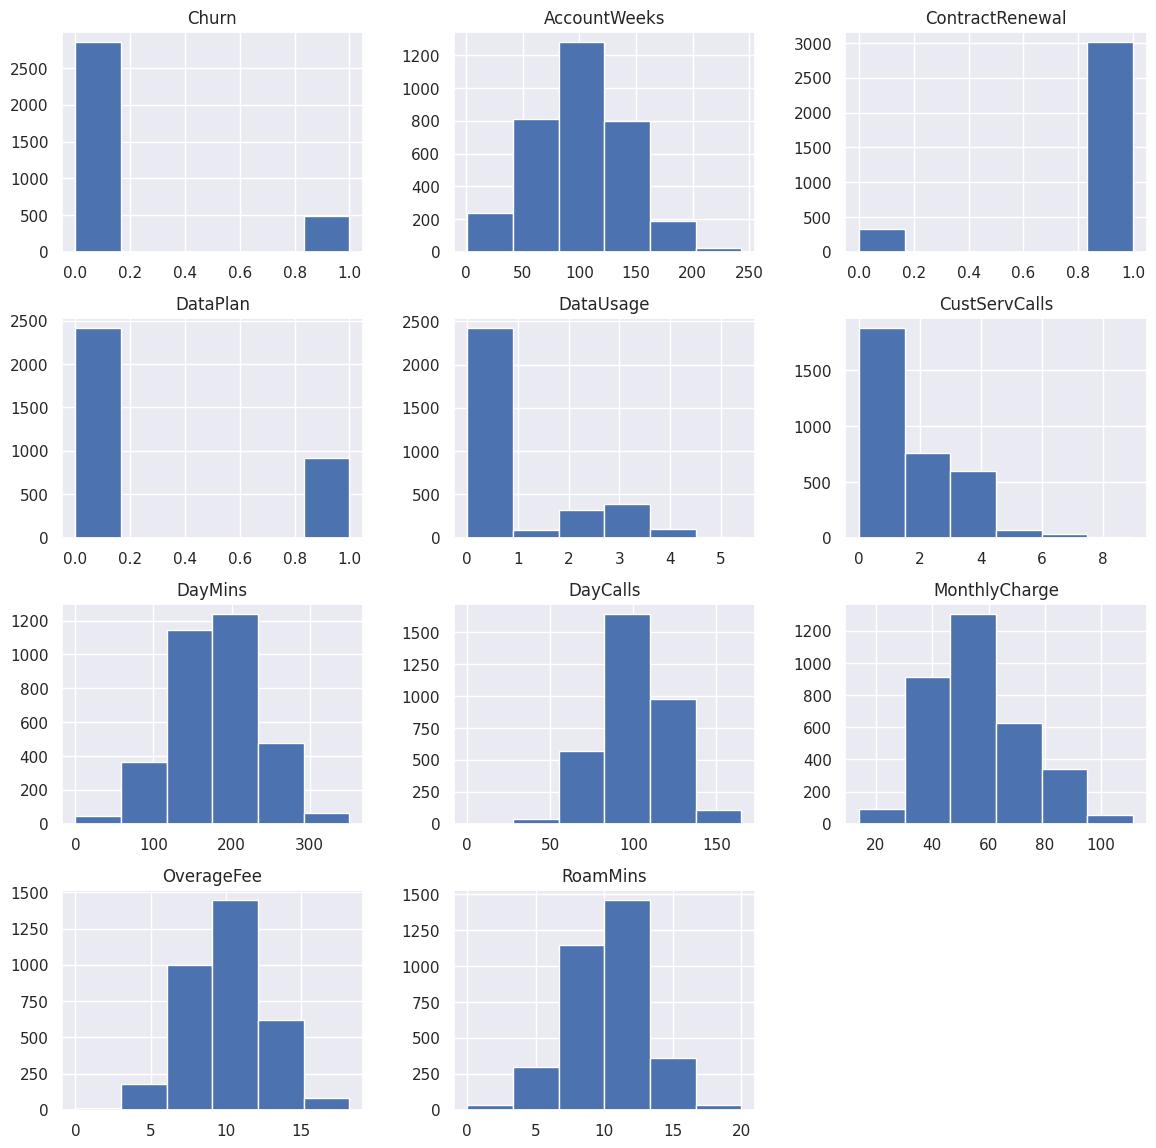

In [ ]:
# Импортируем библиотеки отрисовки
import seaborn as sns
import matplotlib.pyplot as plt

# Улучшатор стилей в matplotlib
sns.set()

# Построим гистограммы наших данных с числом бинов 6
data.hist(bins=6, figsize=(14,14));

Все выглядит вполне хорошо!

Давайте переходить к корреляциям.



<Figure size 1500x1200 with 0 Axes>

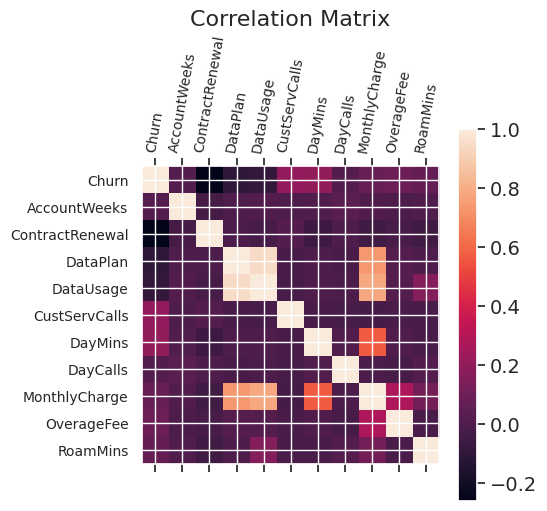

In [ ]:
f = plt.figure(figsize=(15, 12))
plt.matshow(data.corr(numeric_only = True))
plt.xticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=10, rotation=80)
plt.yticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

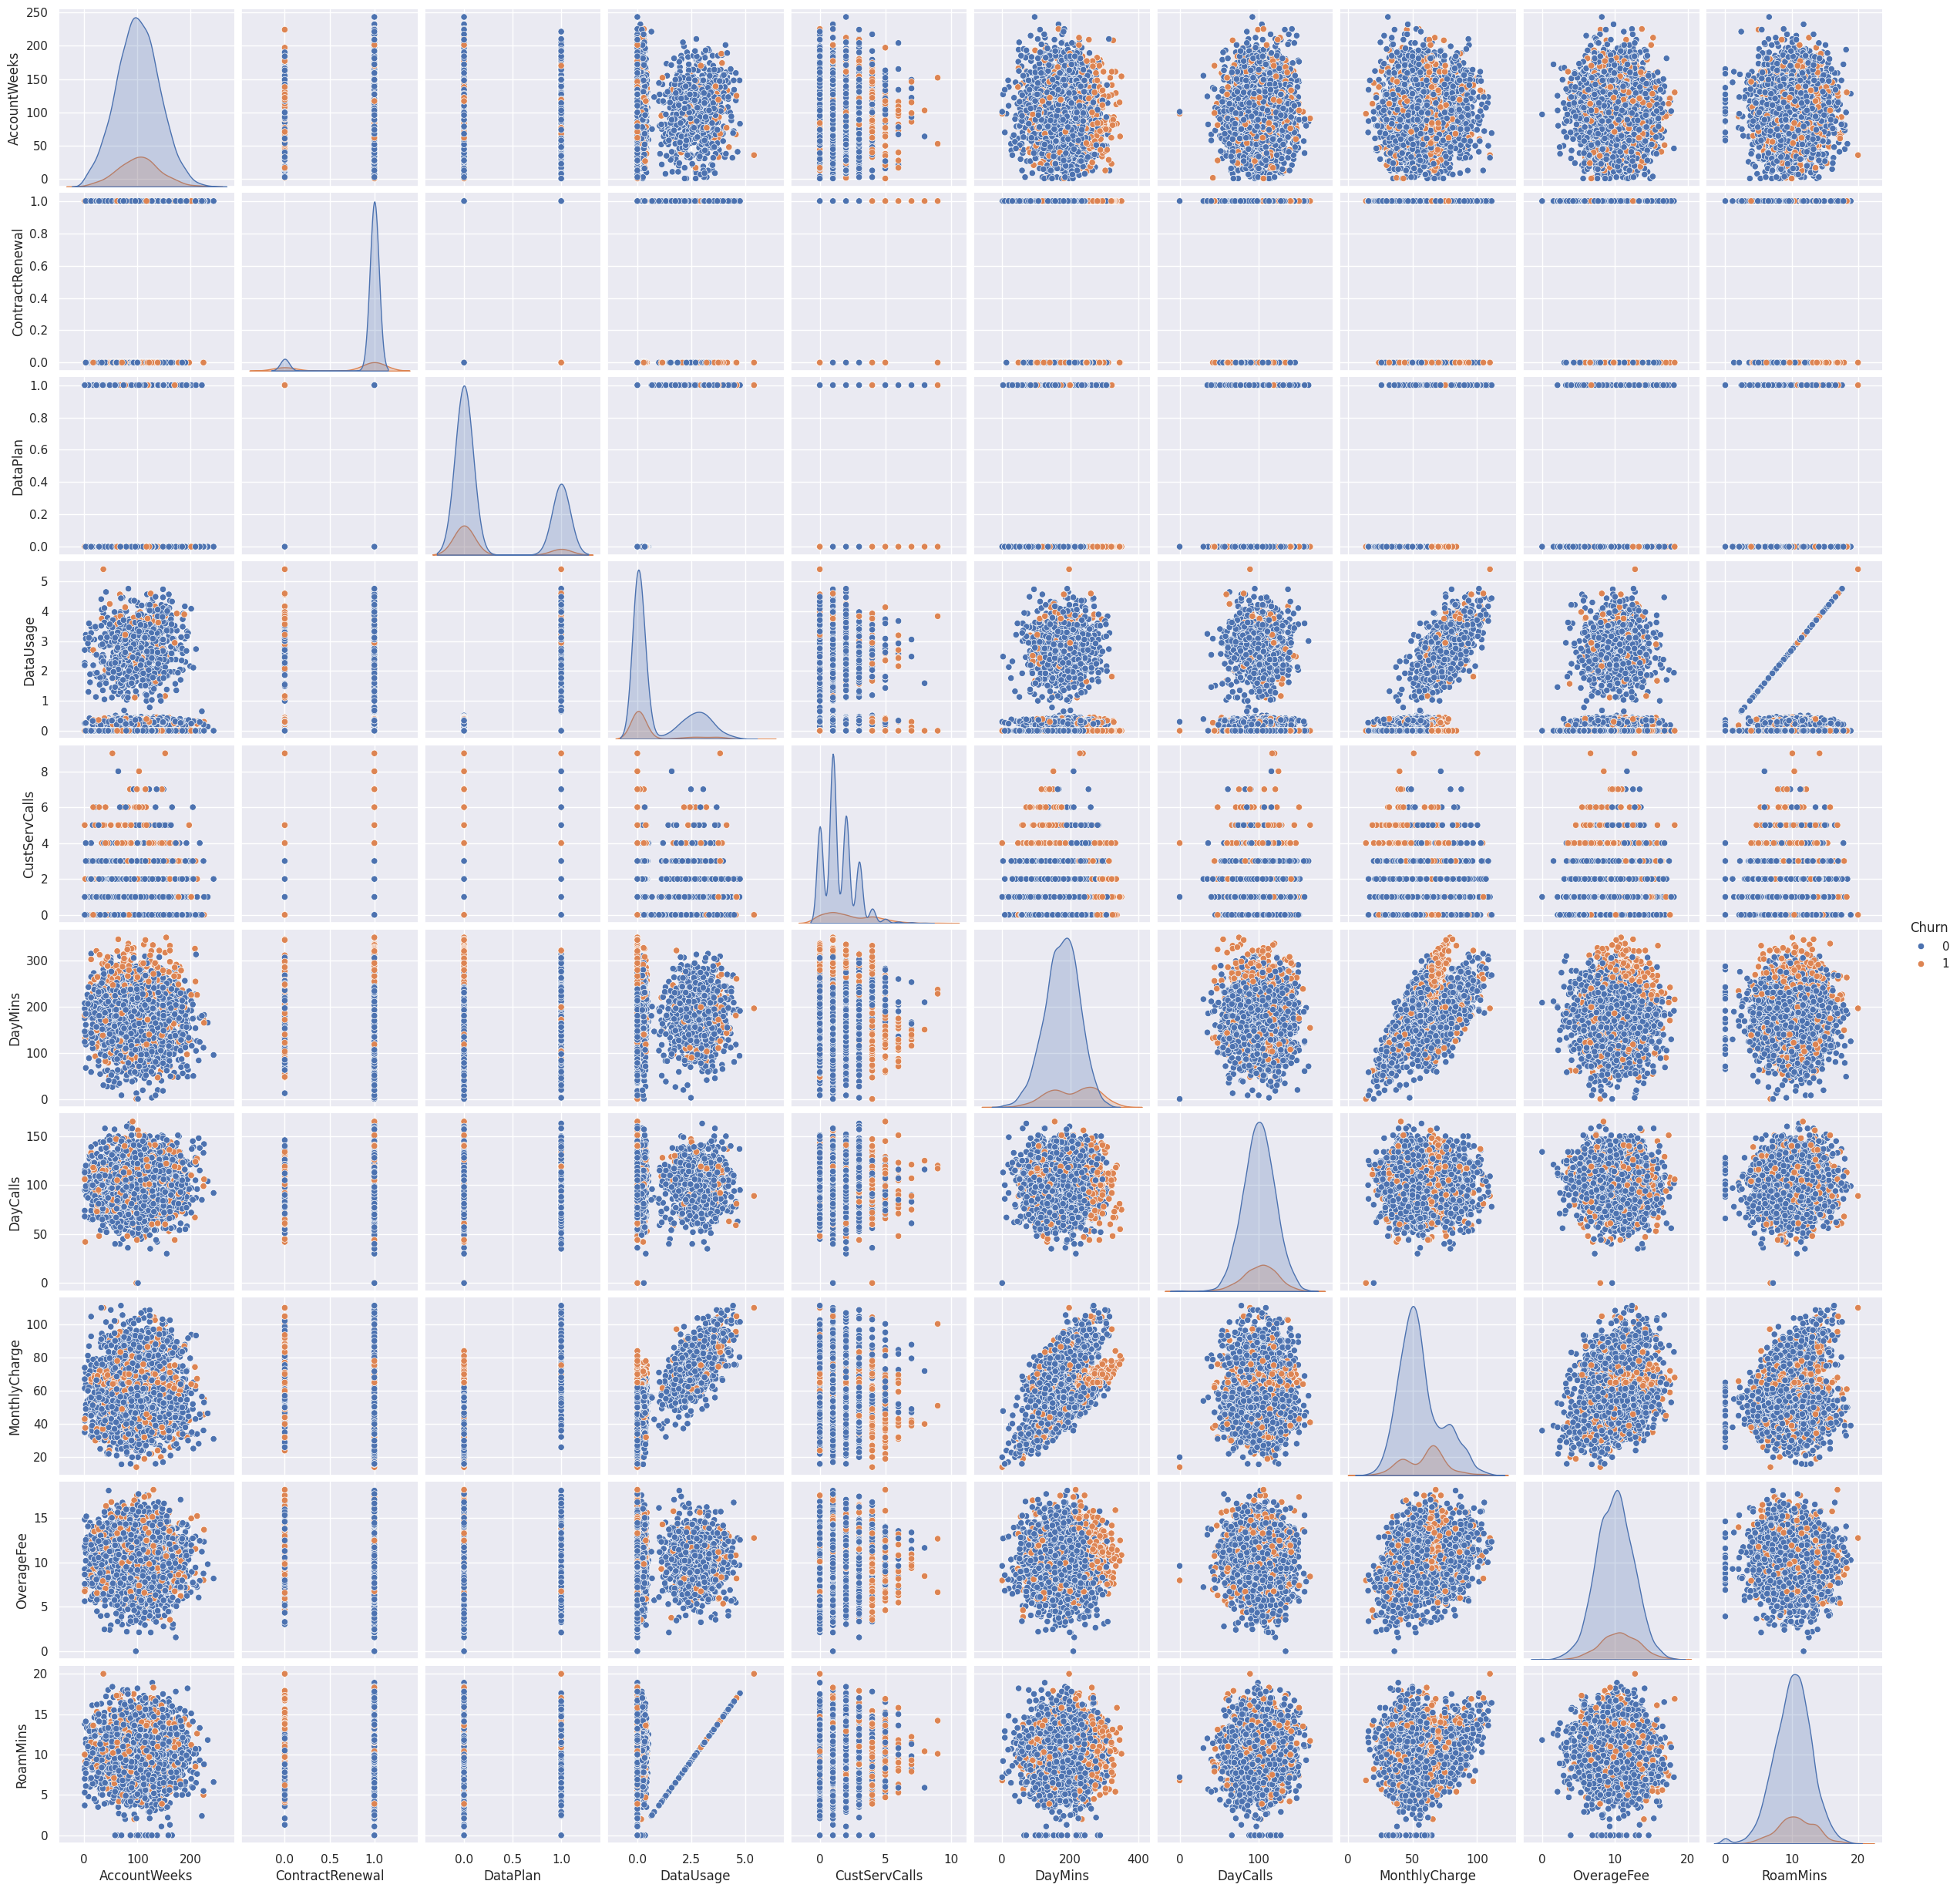

In [ ]:
# При помощи функции pairplot библиотеки seaborn построим графики для каждой пары признаков (укажем в качестве цветов точек колонку 'Churn')
sns.pairplot(data, hue='Churn')

Из интересного — если мы посмотрим на график совместного распределения CustServCalls и DayMin, то увидим, что для уходящих от нас пользователей есть две ярко выраженные группы.
1. Те, кто мало разговаривают (DayMins маленький), но много звонят в CustomerService
2. Те, кто много разговаривают (DayMins большой), но мало звонят в CustomerService

В общем и целом, на этих графиках мы видим взаимодействие трех переменных. Эта информация очень полезна для создания новых признаков (Feature Extraction, Feature Transformation), убирания старых (Feature Selection) и выбора алгоритмов.

Более чёткое понимание, как использовать такие графики, придет к вам с опытом!

## Анализ алгоритма

Сегодня мы концентрируемся на k ближайших соседей. Про алгоритм мы уже говорили на лекции.


<a href="https://ibb.co/d6MCxhX"><img src="https://i.ibb.co/QnQSt5h/2021-12-04-22-09-15.png" alt="2021-12-04-22-09-15" border="0" width=50%></a>


K ближайших соседей — очень хорошо изученный алгоритм, он даже теоретически идеален: если у нас есть бесконечный датасет для обучения, то с помощью knn мы можем восстановить полностью всю зависимость. На самом деле, бесконечный датасет даже и не нужен. Нам нужно просто иметь около каждой точки пространства достаточно много примеров, чтобы мы хорошо могли оценить вероятность для каждого из классов.

Самая большая проблема knn — проклятие размерности. Когда у нас становится много признаков, плотность обучающих примеров в n-мерном пространстве резко снижается.

<a href="https://www.visiondummy.com/2014/04/curse-dimensionality-affect-classification/"><img src="https://www.visiondummy.com/wp-content/uploads/2014/04/curseofdimensionality.png" alt="2021-12-04-22-09-15" border="0" width=70%></a>

С увеличением размерности, все больше объектов обучающей выборки находятся в "углах" пространства признаков.

<a href="https://www.visiondummy.com/2014/04/curse-dimensionality-affect-classification/"><img src="https://www.visiondummy.com/wp-content/uploads/2014/04/sparseness.png" alt="2021-12-04-22-09-15" border="0" width=70%></a>


Отсюда вытекают сильные и слабые стороны KNN

Плюсы:
* Хороший бейзлайн.
* Хорошая интерпретируемость при небольшом числе признаков.
* Быстрый на небольших и средних данных.
* Теоретически идеален и не делает никаких предположений о зависимости.

Минусы:
* Нужно хорошее пространство и метрика, чтобы он работал. Т.е. нужно отбирать признаки, уменьшать размерность данных, стандартизировать признаки и т.д.
* Если можно сделать какие-то предположения о природе данных, их нужно встраивать в модель через создание новых признаков или измение метрики, что очень сложно и требует опыта.



### Улучшение качества работы модели

У нас нет пропусков, что значительно облегчает задачу.

Давайте осуществим следующие этапы для улучшения результатов работы нашего алгоритма:

* Стандартизируем признаки
* Снизим размерность с помощью Principal Component Analysis (с ним мы подробно познакомимся на семинаре по линейной алгебре, а сегодня обсудим интуицию). Судя по графикам корреляции мы сможем снизить размерность на 3-5 совсем без потерь.
* Переберем метрики и k-neighbors, использовав простейший Grid Search.

In [ ]:
# Проделаем тот же пайплайн с загрузкой данных, разделением на признаки и таргеты и разделением на обучение и тест, что и раньше
data = pd.read_csv('telecom_churn.csv')

X = data.drop(columns='Churn')
y = data['Churn']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=12, stratify=y)

Стандартизируем признаки перед применением PCA.

На самом деле, даже без PCA нам пришлось бы стандартизировать признаки, поскольку сам алгоритм KNN работает не лучшим образом в случае, если у признаков плохой scale.


Например, представим,  что по оси x1 — площадь квартиры в десятках квадратных метров, а по оси x2 — оценка продавцом уровня шума в квартире из-за дороги. Из-за того, что единицы измерения по оси x2 другие, то ось x1 будет иметь очень мало веса.

<img src="https://i.stack.imgur.com/OCUmI.png" alt="2021-12-04-22-09-15" border="0" width=49%> <img src="https://i.stack.imgur.com/J5r01.png" alt="2021-12-04-22-09-15" border="0" width=49%>

Познакомимся с новым типом объектов в `sklearn`: `Transformer`. У них есть два основных метода `.fit()` и `.transform()`. Эти объекты учатся на обучающей выборке и потом могут преобразовывать данные. В нашем случае, `Standard Scaler` при обучении запоминает среднее и дисперсию для каждого признака. После, он нормирует данные, используя эти найденные стат.параметры.

$$x_{new} = \frac{x-mean}{std}$$

Вообще, нормировать признаки стоит почти всегда. Это очень важно для
* Метрических алгоритмов
* Линейных алгоритмов (про них мы еще узнаем, что признаки хорошо бы не только отнормировать, но и в идеале как можно сильнее приблизить их распределение к нормальному). К линейным алгоритмам будут относиться как всевозможные регрессии, так и, например, PCA, который мы как раз будем использовать ниже.

Пожалуй, нормировка не важна разве что для основанных на решающих деревьях алгоритмах и их модификациях.

In [ ]:
# Импортируем класс StandardScaler из модуля preprocessing библиотеки sklearn
from sklearn.preprocessing import StandardScaler

# Создадим экземпляр класса StandardScaler
scaler = StandardScaler()

# Обучим его на обучающем датасете
scaler.fit(X_train)

StandardScaler()

In [ ]:
# Применим обученный scaler к обучающему и валидационному датасетам при помощи метода transform
X_train_normed = scaler.transform(X_train)
X_valid_normed = scaler.transform(X_valid)

Отлично! Теперь давайте применим PCA. На лекции мы расскажем про него подробнее позже. Необходимость использования этого алгоритма без объяснения на лекции вызвана практикоориентированностью нашего семинара. Намного ценнее увидеть, как что-то работает в подходящем окружении, чем опустить необходимый алгоритм из-за того, что его нужно проходить в лекции, которая стоит позже.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f5/GaussianScatterPCA.svg/300px-GaussianScatterPCA.svg.png" alt="2021-12-04-22-09-15" border="0" width=30%>

Идейно алгоритм устроен так:
* из всех направлений мы ищем направление, вдоль которого разброс данных наибольший, и фиксируем это направление как первую компоненту
* после, среди всех направлений, перпендикулярных первому, мы ищем направление с наибольшим разбросом. Это вторая компонента.
* после, среди всех направлений, перпендикулярных первому и второму, мы ищем направление с наибольшим разбросом. Это тертья компонента.
и т.д...

После, мы оставляем только k первых компонент и в качестве новых признаков берем проекции старых точек на эти направления. Получается k новых признаков.

На рисунке видно, что если у двух признаков большая корреляция (когда один большой, то и другой тяготеет в большую сторону, и наоборот), то мы можем вместо двух чисел взять одно и почти не потерять информации.


Выбрать, сколько именно признаков оставить, — сложная задача, обычно люди просто перебирают разные значения экспериментально :)

In [ ]:
# Посмотрим на размер исходных признаков
X_train.shape

(2666, 10)

In [ ]:
# Импортируем метод PCA из модуля decomposition библиотеки sklearn
from sklearn.decomposition import PCA

# Создадим объект класса PCA с числом главных компонент равным 7
pca = PCA(n_components = 7)

# Обучим PCA на нормированных признаках
pca.fit(X_train_normed)

PCA(n_components=7)

In [ ]:
# Преобразуем наши данные при помощи метода transform
X_train_pca = pca.transform(X_train_normed)
X_valid_pca = pca.transform(X_valid_normed)

### Итоговая модель

In [ ]:
# Модель
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_pca, y_train)
preds_valid = knn.predict(X_valid_pca)

# Тестирование
print(f'Accuracy  = {accuracy_score(y_valid, preds_valid)}')
print(f'Precision = {precision_score(y_valid, preds_valid)}')
print(f'Recall    = {recall_score(y_valid, preds_valid)}')

Accuracy  = 0.896551724137931
Precision = 0.7592592592592593
Recall    = 0.422680412371134


Ура! Мы улучшили обе метрики — и precision, и recall. А теперь попробуем сделать самописный GridSearch — поиск по сетке из гиперпараметров. Это будет не очень красиво, но зато очень наглядно (будем надеяться :) ).

In [ ]:
precisions = []
recalls = []

# В двойном цикле по числу компонент и числу соседей проведем весь описанный выше пайплайн
for pca_components in [10, 9, 8, 7, 6, 5]:
    for k_neighbors in [1, 2, 4, 5, 7]:
        scaler = StandardScaler()
        scaler.fit(X_train)
        X_train_normed = scaler.transform(X_train)
        X_valid_normed = scaler.transform(X_valid)

        pca = PCA(pca_components)
        pca.fit(X_train_normed)

        X_train_pca = pca.transform(X_train_normed)
        X_valid_pca = pca.transform(X_valid_normed)

        # Модель
        knn = KNeighborsClassifier(n_neighbors=k_neighbors)
        knn.fit(X_train_pca, y_train)
        preds_valid = knn.predict(X_valid_pca)

        # Тестирование
        print(f'Hyper parameters: pca_components={pca_components}, k_neighbors={k_neighbors}')
        print(f'Accuracy  = {accuracy_score(y_valid, preds_valid)}')
        precisions.append(precision_score(y_valid, preds_valid))
        print(f'Precision = {precisions[-1]}')
        recalls.append(recall_score(y_valid, preds_valid))
        print(f'Recall    = {recalls[-1]}')
        print()

Hyper parameters: pca_components=10, k_neighbors=1
Accuracy  = 0.8650674662668666
Precision = 0.5346534653465347
Recall    = 0.5567010309278351

Hyper parameters: pca_components=10, k_neighbors=2
Accuracy  = 0.8830584707646177
Precision = 0.7111111111111111
Recall    = 0.32989690721649484

Hyper parameters: pca_components=10, k_neighbors=4
Accuracy  = 0.8875562218890555
Precision = 0.75
Recall    = 0.3402061855670103

Hyper parameters: pca_components=10, k_neighbors=5
Accuracy  = 0.896551724137931
Precision = 0.7413793103448276
Recall    = 0.44329896907216493

Hyper parameters: pca_components=10, k_neighbors=7
Accuracy  = 0.8950524737631185
Precision = 0.7647058823529411
Recall    = 0.4020618556701031

Hyper parameters: pca_components=9, k_neighbors=1
Accuracy  = 0.8650674662668666
Precision = 0.5346534653465347
Recall    = 0.5567010309278351

Hyper parameters: pca_components=9, k_neighbors=2
Accuracy  = 0.8830584707646177
Precision = 0.7111111111111111
Recall    = 0.32989690721649484


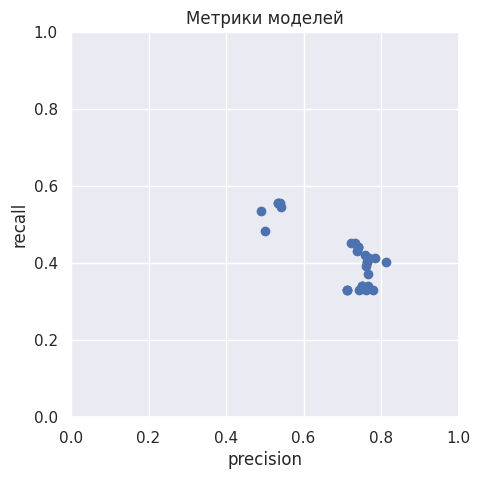

In [ ]:
plt.figure(figsize=(5, 5))

# Отрисуем метрики на графике scatter
plt.scatter(precisions, recalls)

plt.xlim((0, 1))
plt.ylim((0, 1))
plt.xlabel('precision')
plt.ylabel('recall')
plt.title('Метрики моделей');

Выбор лучшего набора параметров диктуется предметной областью — тем, насколько дорого нам обходится ошибочное признание отточным клиента и насколько дорого обходится пропуск потенциально отточного клиента. Размышления на этот счет отводятся слушателю :)